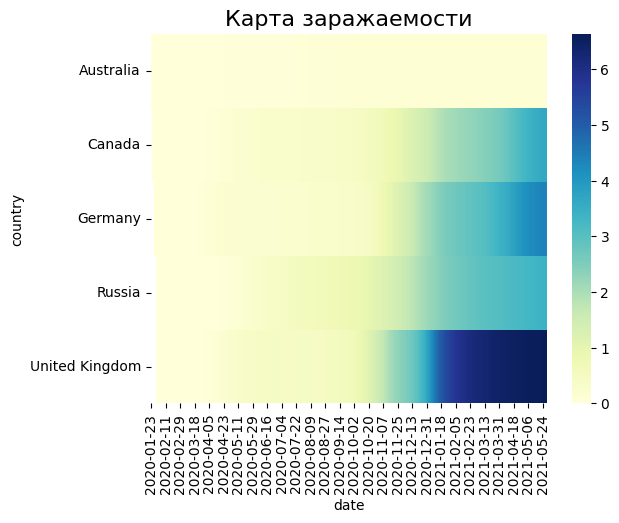

In [6]:
import pandas as pd

vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

covid_data = pd.read_csv('data/covid_data.csv')
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

covid_data['date'] = pd.to_datetime(covid_data['date'])

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()



#covid_data['date'].max()
#vaccinations_data['date'].min()
#vaccinations_data['date'].max()

covid_df = covid_data.merge(
    vaccinations_data,
    on=['country', 'date'],
    how='left'
)
covid_df.to_csv('data/covid_df.csv', sep=',')
#covid_df['death_rate']= (covid_df['deaths']/covid_df['confirmed'])*100

#covid_df['recovered_rate']= (covid_df['recovered']/covid_df['confirmed'])*100

#mask = (covid_df['country'] == 'Russia')
#covid_df[mask]['recovered_rate'].mean()
import seaborn as sns

countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
#croped_covid_df.head()

croped_covid_df['confirmed_per_hundred']= (croped_covid_df['confirmed']/croped_covid_df['population'])*100
#croped_covid_df.info()

pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')


heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Карта заражаемости', fontsize=16);